In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [3]:
sns.set(font_scale=1.2, style='ticks')

In [24]:
df_sum = pd.read_csv('summary_df.csv', index_col=0)
df_sum.loc[199]

years               199
days              72635
no_individuals     7279
no_births            77
no_deaths           104
no_immigrants         0
Name: 199, dtype: int64

In [25]:
77/2996.

0.02570093457943925

In [4]:
df = pd.read_csv('time_snapshots_household_df.csv', index_col=0)
df.head()

,time,household_id,member,infant,school_age,adult,retired,household_size
ind,,,,,,,,
0,199,14546,23372,0,0,0,1,1
1,199,14644,23398;23976,0,0,0,2,2
2,199,14728,23160;23209;23303,0,0,0,3,3
3,199,14827,24196;24393,0,0,0,2,2
4,199,15113,23186,0,0,0,1,1


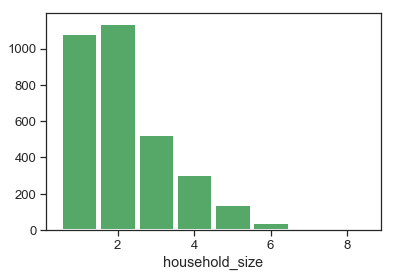

In [5]:
sns.distplot(df.household_size, kde=False, bins=range(1,10), hist_kws={"linewidth": 3,
...                             "alpha": 1, "color": "g", "rwidth":0.95, "align":'left'})

In [5]:
df['children'] = df['infant'] + df['school_age']
df.head()

,time,household_id,member,infant,school_age,adult,retired,household_size,children
ind,,,,,,,,,
0,199,14546,23372,0,0,0,1,1,0
1,199,14644,23398;23976,0,0,0,2,2,0
2,199,14728,23160;23209;23303,0,0,0,3,3,0
3,199,14827,24196;24393,0,0,0,2,2,0
4,199,15113,23186,0,0,0,1,1,0


In [6]:
age_groups = ['children', 'adult', 'retired']

In [7]:
household_type_counts = { ty:0 for ty in range(8) }

for i in range(len(df)):
    row = df.iloc[i]
    #print(row)
    c = row['children']
    a = row['adult']
    r = row['retired']
    if r==0 and a==0 and c>0: # only children household, not exist by rules 
        household_type_counts[0]+=1
    elif r>0 and a==0 and c==0:
        household_type_counts[1]+=1
    elif r==0 and a>0 and c==0:
        household_type_counts[2]+=1
    elif r>0 and a>0 and c==0:
        household_type_counts[3]+=1
    elif r>0 and a==0 and c>0:
        household_type_counts[4]+=1
    elif r==0 and a>0 and c>0:
        household_type_counts[5]+=1
    elif r>0 and a>0 and c>0:
        household_type_counts[6]+=1
    else:
        # all == 0, a no-people household, not possible to be exist, just for safely capture the else statement
        household_type_counts[7]+=1
household_type_counts

{0: 0, 1: 1181, 2: 1110, 3: 127, 4: 1, 5: 818, 6: 26, 7: 0}

In [8]:
household_type_size_counts = { ty:{k:0 for k in range(1,10)} for ty in range(8) }

for i in range(len(df)):
    row = df.iloc[i]
    #print(row)
    c = row['children']
    a = row['adult']
    r = row['retired']
    if r==0 and a==0 and c>0: # only children household, not exist by rules 
        htype = household_type_size_counts[0]
    elif r>0 and a==0 and c==0:
        htype = household_type_size_counts[1]
    elif r==0 and a>0 and c==0:
        htype = household_type_size_counts[2]
    elif r>0 and a>0 and c==0:
        htype = household_type_size_counts[3]
    elif r>0 and a==0 and c>0:
        htype = household_type_size_counts[4]
    elif r==0 and a>0 and c>0:
        htype = household_type_size_counts[5]
    elif r>0 and a>0 and c>0:
        htype = household_type_size_counts[6]
    else:
        # all == 0, a no-people household, not possible to be exist, just for safely capture the else statement
        htype = household_type_counts[7]
    hsize = row['household_size']
    if not(hsize in htype): htype[hsize] = 0
    htype[hsize]+=1
household_type_size_counts

{0: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 1: {1: 738, 2: 440, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0},
 2: {1: 345, 2: 553, 3: 163, 4: 36, 5: 12, 6: 1, 7: 0, 8: 0, 9: 0},
 3: {1: 0, 2: 82, 3: 41, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 4: {1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0},
 5: {1: 0, 2: 65, 3: 320, 4: 257, 5: 121, 6: 39, 7: 10, 8: 5, 9: 1},
 6: {1: 0, 2: 0, 3: 3, 4: 10, 5: 10, 6: 3, 7: 0, 8: 0, 9: 0},
 7: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}}

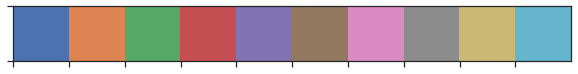

In [9]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

simple version with same meaning

$$
R = \big\{ household ~|~ at~least~one~member~with~age~ \geq 65 \big\} 
$$

$$
A = \big\{ household ~|~ at~least~one~member~with~age~in~between~  \geq 18 ~and~ < 65 \big\} 
$$

$$
C = \big\{ household ~|~ at~least~one~member~with~age~ < 18 \big\} 
$$

$$
type~I = R \setminus \big( A \cup C \big) 
$$

$$
type~II = A \setminus \big( A \cup C \big) 
$$

$$
type~III = R \cap A \setminus C
$$

$$
type~IV = R \cap C \setminus A
$$

$$
type~V = A \cap C \setminus R 
$$

$$
type~VI = R \cap A \cap C
$$

more specific version

$$
R = \big\{ household ~|~ at~least~one~member~with~age~ \geq 65 \big\} 
$$

$$
A = \big\{ household ~|~ at~least~one~member~with~age~in~between~  \geq 18 ~and~ < 65 \big\} 
$$

$$
C = \big\{ household ~|~ at~least~one~member~with~age~ < 18 \big\} 
$$

$$
type~I = R \setminus \big( (R \cap A) \cup (R \cap C) \big) 
$$

$$
type~II = A \setminus \big( (R \cap A) \cup (A \cap C) \big) 
$$

$$
type~III = R \cap A \setminus \big( R \cap A \cap C \big) 
$$

$$
type~IV = R \cap C \setminus \big( R \cap A \cap C \big) 
$$

$$
type~V = A \cap C \setminus \big( R \cap A \cap C \big) 
$$

$$
type~VI = R \cap A \cap C
$$

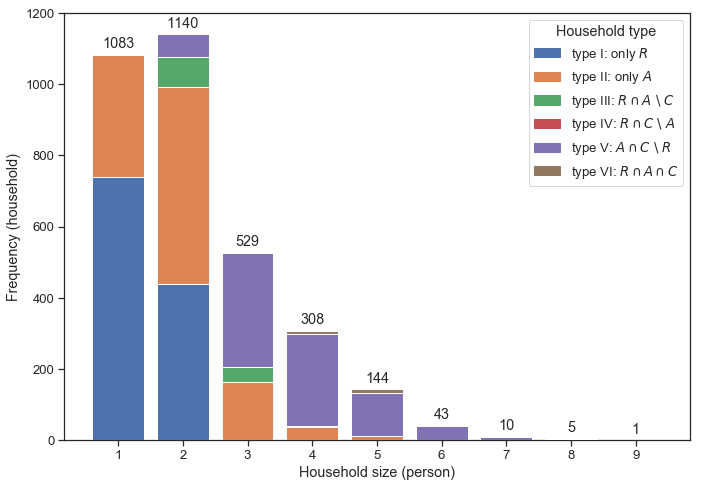

In [39]:
fig, ax = plt.subplots(figsize=(10,7))

prev_cum = [0 for i in range(1,10)]
for ht in range(1,7):
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
    #print(x,y)
    #break
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')
    
ax.set_ylim([0,1200])
ax.set_xlabel('Household size (person)')
ax.set_ylabel('Frequency (household)')
ax.set_xticks(list(range(1,10)))

cols = []
labs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
ax.legend(handles=cols, title='Household type')
plt.tight_layout()
plt.savefig('household_type_count.png',dpi=72, bbox_inches='tight')

In [1]:
200/3000

0.06666666666666667

R is the set of household with at least one retired

$$
R = I \cup III \cup IV \cup VI
$$

A is the set of household with at least one adult

$$
A = II \cup III \cup V \cup VI
$$

C is the set of household with at least one children

$$
C = IV \cup V \cup VI
$$

In [12]:
household_type_size_counts

{0: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0},
 1: {1: 738, 2: 440, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0},
 2: {1: 345, 2: 553, 3: 163, 4: 36, 5: 12, 6: 1, 7: 0, 8: 0},
 3: {1: 0, 2: 82, 3: 41, 4: 4, 5: 0, 6: 0, 7: 0, 8: 0},
 4: {1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0},
 5: {1: 0, 2: 65, 3: 320, 4: 257, 5: 121, 6: 39, 7: 10, 8: 5, 9: 1},
 6: {1: 0, 2: 0, 3: 3, 4: 10, 5: 10, 6: 3, 7: 0, 8: 0},
 7: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}}

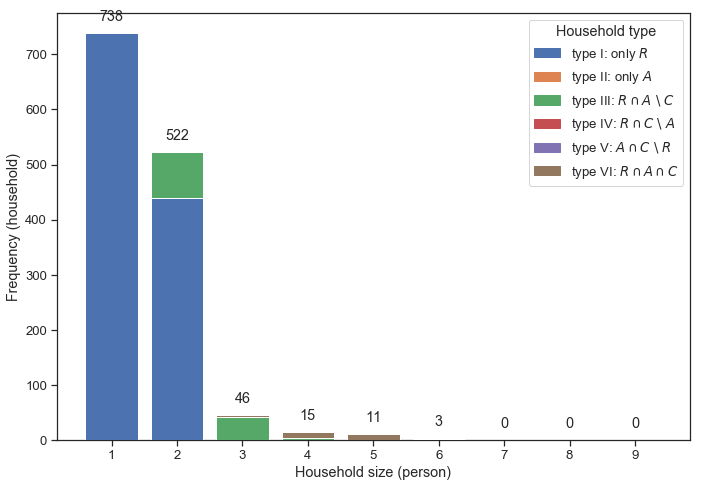

In [41]:
Rtypes = [1,3,4,6]
Atypes = [2,3,5,6]
Ctypes = [4,5,6]

fig, ax = plt.subplots(figsize=(10,7))

prev_cum = [0 for i in range(1,10)]
for ht in Rtypes:
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
    #print(x,y)
    #break
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')
    
#ax.set_ylim([0,1200])
ax.set_xlabel('Household size (person)')
ax.set_ylabel('Frequency (household)')
ax.set_xticks(list(range(1,10)))

cols = []
labs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
ax.legend(handles=cols, title='Household type')
plt.tight_layout()
#plt.savefig('household_type_count.png',dpi=72, bbox_inches='tight')

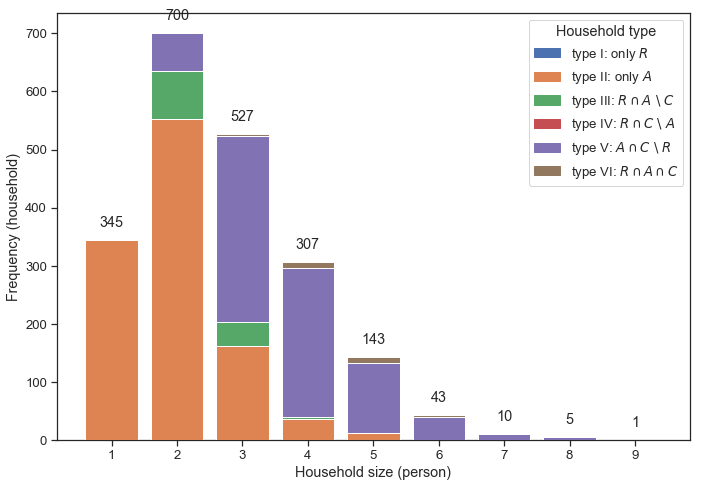

In [42]:
Rtypes = [1,3,4,6]
Atypes = [2,3,5,6]
Ctypes = [4,5,6]

fig, ax = plt.subplots(figsize=(10,7))

prev_cum = [0 for i in range(1,10)]
for ht in Atypes:
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
    #print(x,y)
    #break
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')
    
#ax.set_ylim([0,1200])
ax.set_xlabel('Household size (person)')
ax.set_ylabel('Frequency (household)')
ax.set_xticks(list(range(1,10)))

cols = []
labs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
ax.legend(handles=cols, title='Household type')
plt.tight_layout()
#plt.savefig('household_type_count.png',dpi=72, bbox_inches='tight')

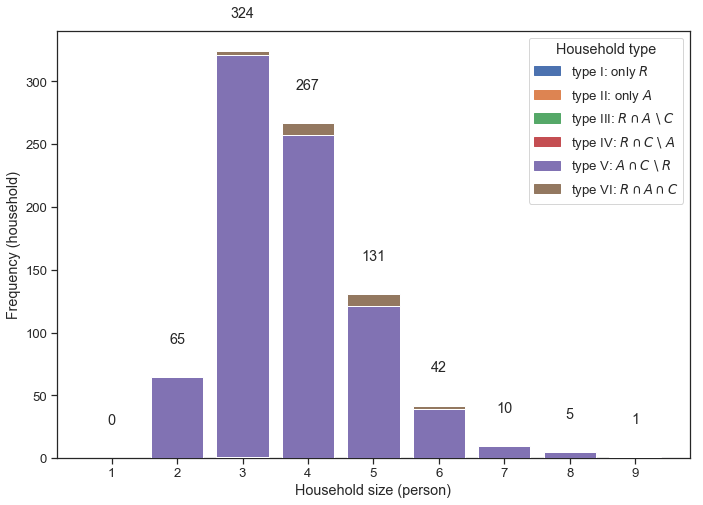

In [43]:
Rtypes = [1,3,4,6]
Atypes = [2,3,5,6]
Ctypes = [4,5,6]

fig, ax = plt.subplots(figsize=(10,7))

prev_cum = [0 for i in range(1,10)]
for ht in Ctypes:
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
    #print(x,y)
    #break
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')
    
#ax.set_ylim([0,1200])
ax.set_xlabel('Household size (person)')
ax.set_ylabel('Frequency (household)')
ax.set_xticks(list(range(1,10)))

cols = []
labs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
ax.legend(handles=cols, title='Household type')
plt.tight_layout()
#plt.savefig('household_type_count.png',dpi=72, bbox_inches='tight')

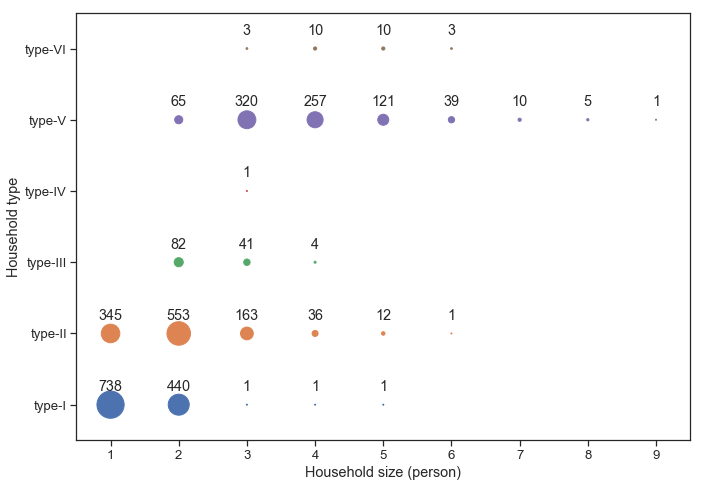

In [80]:
Rtypes = [1,3,4,6]
Atypes = [2,3,5,6]
Ctypes = [4,5,6]

fig, ax = plt.subplots(figsize=(10,7))

#prev_cum = [0 for i in range(1,10)]
for ht in household_type_size_counts.keys():
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ht]*len(x)
    s = [ hs[k] for k in range(1,10) ]
    ax.scatter(x,y, s=s, color=current_palette[ht-1], zorder=9-ht)
    for a,b,c in zip(x,y,s):
        if c>0: ax.text(a, b+0.25, c, ha='center', va='center', zorder=10)
    #prev_cum = y2
    #print(x,y)
    #break
    
    
ax.set_xlim([0.5,9.5])
ax.set_ylim([0.5,6.5])
ax.set_xlabel('Household size (person)')
ax.set_ylabel('Household type')
ax.set_xticks(list(range(1,10)))
ax.set_yticklabels(['type-O', 'type-I', 'type-II', 'type-III', 'type-IV', 'type-V', 'type-VI'])
plt.tight_layout()
#plt.savefig('household_type_count.png',dpi=72, bbox_inches='tight')

1 [0.8846441947565543, 0.0, 0.0]
2 [0.8846441947565543, 0.5333974050937049, 0.0]
3 [0.9797752808988764, 0.5944257568476694, 0.0]
4 [0.9805243445692884, 0.5944257568476694, 0.001183431952662722]
5 [0.9805243445692884, 0.9875060067275349, 0.9692307692307692]
6 [1.0, 1.0, 1.0]


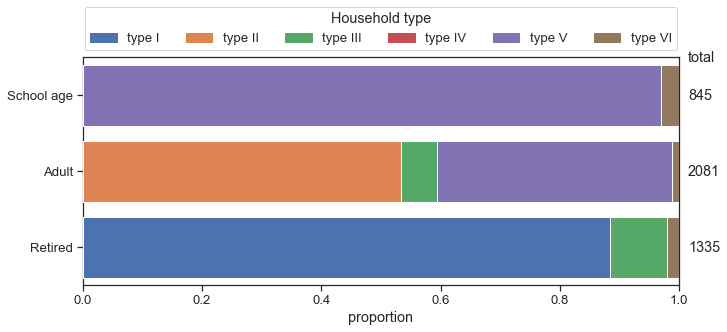

In [128]:
Rtypes = [1,3,4,6]
Atypes = [2,3,5,6]
Ctypes = [4,5,6]
household_type_size_counts
yseq = [Rtypes, Atypes, Ctypes]
yseq_lab = ['R', 'A', 'C']
hbars = { k:[] for k in range(1,7) }
all_sums = []

fig, ax = plt.subplots(figsize=(10,5))
for i in range(3):
    this_type = yseq[i]
    #temp = {k:0 for k in range(1,10)}
    temp = [ 0 for j in range(1,7) ]
    for ht in this_type:
        #print()
        this = household_type_size_counts[ht]
        #temp = { k:v+this[k] for k,v in temp.items() }
        this_sum = sum([v for k,v in this.items()])
        #temp.append(this_sum)
        temp[ht-1] = this_sum
    all_sum = sum(temp)
    all_sums.append(all_sum)
    temp2 = [ s/all_sum for s in temp ]
    temp3 = [temp2[0]]
    for j in range(1,6):
        temp3.append( temp3[j-1]+temp2[j] )
    #print(temp3)
    for k in range(1,7):
        hbars[k].append(temp3[k-1])
#print(hbars)
for k,v in hbars.items():
    print(k,v)
    ax.barh(y=[0,1,2], width=v, zorder=9-k)
for i in range(3):
    asum = all_sums[i]
    ax.text(1.015, i, asum, ha='left', va='center', zorder=10)
ax.text(1.015, 2.5, 'total', ha='left', va='center', zorder=10)
    
ax.set_xlim([0,1])
ax.set_ylim([-0.5, 2.5])
ax.set_yticks([0,1,2])
ax.set_yticklabels(['Retired', 'Adult', 'School age'])
ax.set_xlabel('proportion')

cols = []
labs = ['', 
        'I', 
        'II', 
        'III', 
        'IV', 
        'V', 
        'VI']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
ax.legend(handles=cols, title='Household type', loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=6)
plt.tight_layout()

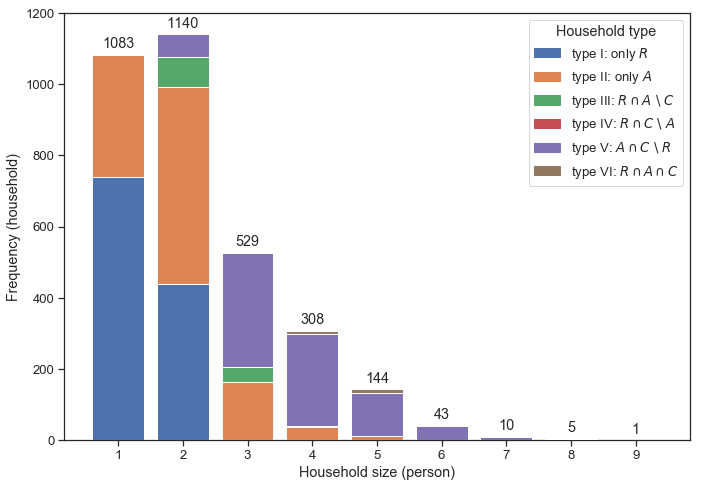

In [125]:
fig, ax = plt.subplots(figsize=(10,7))

prev_cum = [0 for i in range(1,10)]
for ht in range(1,7):
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
    #print(x,y)
    #break
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')
    
ax.set_ylim([0,1200])
ax.set_xlabel('Household size (person)')
ax.set_ylabel('Frequency (household)')
ax.set_xticks(list(range(1,10)))

cols = []
labs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
ax.legend(handles=cols, title='Household type')
plt.tight_layout()
#plt.savefig('household_type_count.png',dpi=72, bbox_inches='tight')

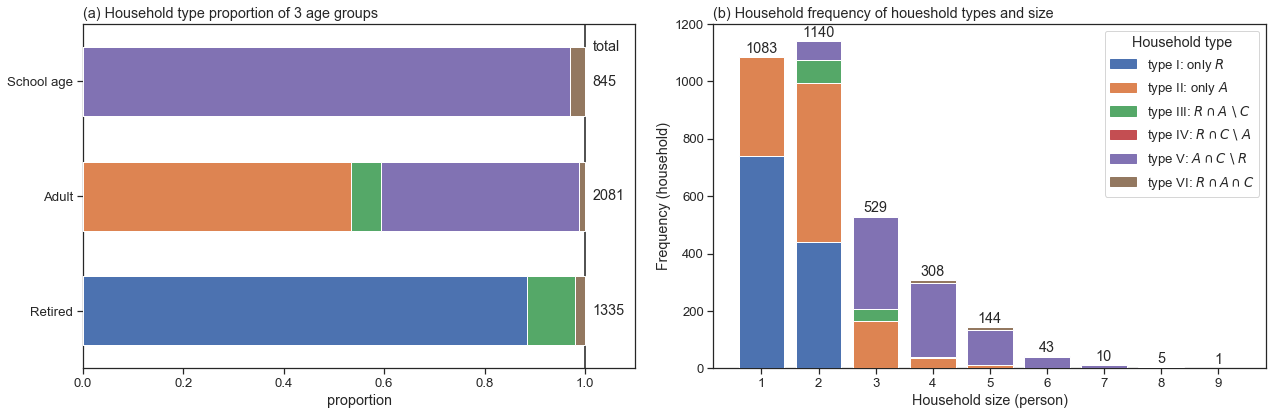

In [153]:

fig, axs = plt.subplots(1,2, figsize=(18,6))
ax1,ax2 = axs
for k,v in hbars.items():
    #print(k,v)
    ax1.barh(y=[0,1,2], width=v, height=0.6, zorder=9-k)
for i in range(3):
    asum = all_sums[i]
    ax1.text(1.015, i, asum, ha='left', va='center', zorder=10)
ax1.text(1.015, 2.3, 'total', ha='left', va='center', zorder=10)
ax1.axvline(x=1.0, c='k')
    
ax1.set_xlim([0,1.1])
ax1.set_xticks([ x*0.2 for x in range(6) ])
ax1.set_ylim([-0.5, 2.5])
ax1.set_yticks([0,1,2])
ax1.set_yticklabels(['Retired', 'Adult', 'School age'])
ax1.set_xlabel('proportion')

cols = []
labs = ['', 
        'I', 
        'II', 
        'III', 
        'IV', 
        'V', 
        'VI']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
#ax1.legend(handles=cols, title='Household type', loc='upper center', ncol=6)
ax1.set_title('(a) Household type proportion of 3 age groups', loc='left')

prev_cum = [0 for i in range(1,10)]
for ht in range(1,7):
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax2.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
    #print(x,y)
    #break
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax2.text(xx, yy, b, ha='center', va='center')
    
ax2.set_ylim([0,1200])
ax2.set_xlabel('Household size (person)')
ax2.set_ylabel('Frequency (household)')
ax2.set_xticks(list(range(1,10)))
cols2 = []
labs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols2.append(patch)
ax2.legend(handles=cols2, title='Household type')
ax2.set_title('(b) Household frequency of houeshold types and size', loc='left')


plt.tight_layout()
plt.savefig('household_type_count.png',dpi=72, bbox_inches='tight')

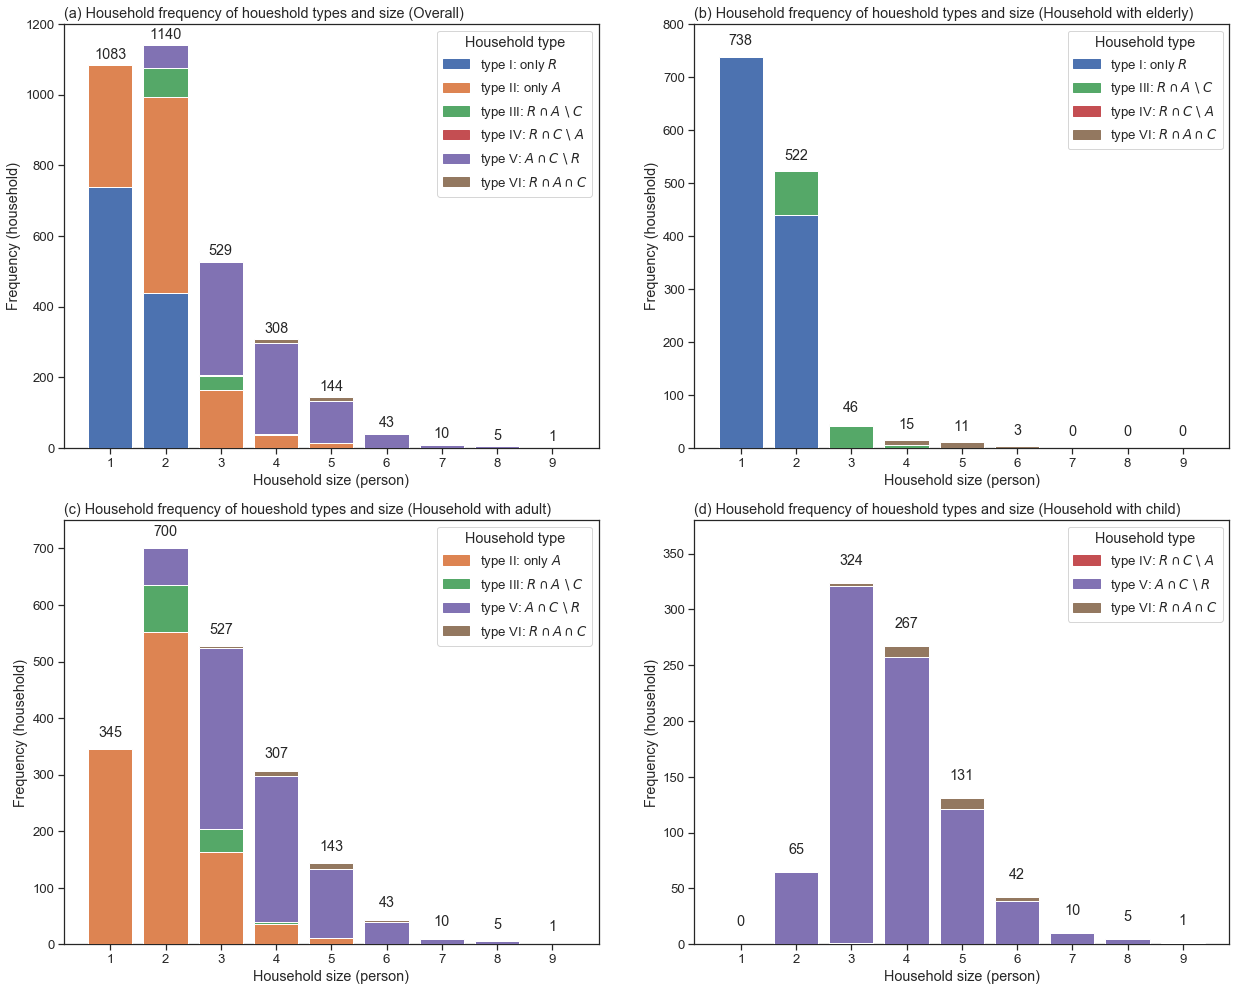

In [21]:
Rtypes = [1,3,4,6]
Atypes = [2,3,5,6]
Ctypes = [4,5,6]

fig, axg = plt.subplots(2, 2, figsize=(18,14))
axs = axg.flatten()

prev_cum = [0 for i in range(1,10)]
for ht in range(1,7):
    ax = axs[0]
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
ax.set_ylim([0, 1200])
ax.set_title('(a) Household frequency of houeshold types and size (Overall)', loc='left')
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')
        


prev_cum = [0 for i in range(1,10)]
for ht in Rtypes:
    ax = axs[1]
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
ax.set_ylim([0, 800])
ax.set_title('(b) Household frequency of houeshold types and size (Household with elderly)', loc='left')

for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')
    
    
prev_cum = [0 for i in range(1,10)]
for ht in Atypes:
    ax = axs[2]
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
ax.set_ylim([0, 750])
ax.set_title('(c) Household frequency of houeshold types and size (Household with adult)', loc='left')
    
for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+30
    ax.text(xx, yy, b, ha='center', va='center')

    
prev_cum = [0 for i in range(1,10)]
for ht in Ctypes:
    ax = axs[3]
    hs = household_type_size_counts[ht]
    x = list(range(1,10))
    y = [ hs[k] for k in range(1,10) ]
    y2 = [ a+b for a,b in zip(prev_cum, y) ]
    ax.bar(x,y2, color=current_palette[ht-1], zorder=9-ht)
    prev_cum = y2
ax.set_ylim([0, 380])
ax.set_title('(d) Household frequency of houeshold types and size (Household with child)', loc='left')

for a,b in zip(list(range(1,10)), prev_cum):
    xx = a
    yy = b+20
    ax.text(xx, yy, b, ha='center', va='center')
    

for ax in axs:
    ax.set_xlabel('Household size (person)')
    ax.set_ylabel('Frequency (household)')
    ax.set_xticks(list(range(1,10)))

cols = []
labs = ['zero: only $C$', 
        'I: only $R$', 
        'II: only $A$', 
        r'III: $R \cap A \ \backslash \ C$', 
        r'IV: $R \cap C \ \backslash \ A$', 
        r'V: $A \cap C \ \backslash \ R$', 
        r'VI: $R \cap A \cap C$']
for i in range(1,7):
    patch = mpatches.Patch(color=current_palette[i-1], label='type {}'.format(labs[i]))
    cols.append(patch)
axs[0].legend(handles=cols, title='Household type')

threetypes = [Rtypes, Atypes, Ctypes]
for i in range(1,4):
    htypes = threetypes[i-1]
    patches = []
    for h in htypes:
        patch = mpatches.Patch(color=current_palette[h-1], label='type {}'.format(labs[h]))
        patches.append(patch)
    axs[i].legend(handles=patches, title='Household type')

plt.tight_layout()
plt.savefig('household_type_countb.png',dpi=72, bbox_inches='tight')